## Wine clustering

In [2]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np

wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
X=wine['data']
y=wine['target']

In [4]:
X.shape, y.shape

((178, 13), (178,))

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## K-means clustering

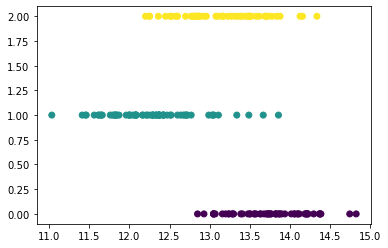

In [7]:
plt.scatter(X[:,0], y, c=y)

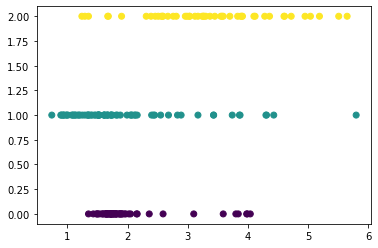

In [8]:
plt.scatter(X[:,1], y, c=y)

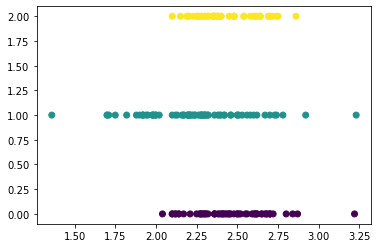

In [9]:
plt.scatter(X[:,2], y, c=y)

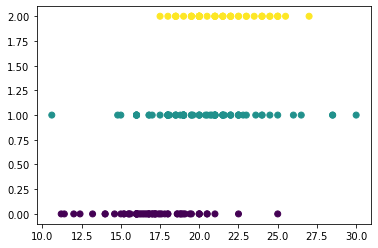

In [10]:
plt.scatter(X[:,3], y, c=y)

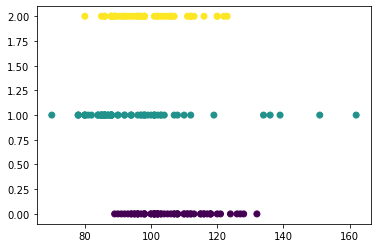

In [11]:
plt.scatter(X[:,4], y, c=y)

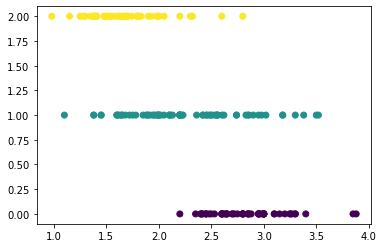

In [12]:
plt.scatter(X[:,5], y, c=y) #좋은 반비례 관계를 나타내고 있다.

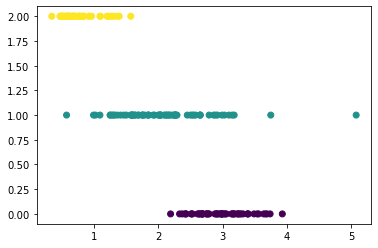

In [13]:
plt.scatter(X[:,6], y, c=y)

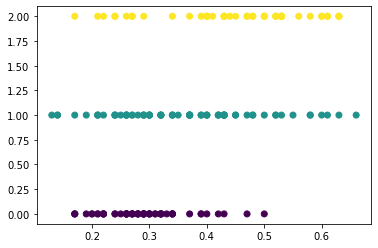

In [14]:
plt.scatter(X[:,7], y, c=y)

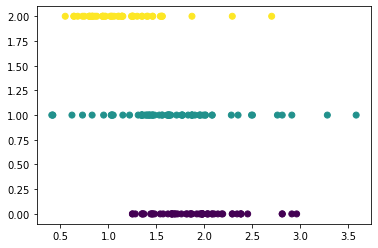

In [15]:
plt.scatter(X[:,8], y, c=y)

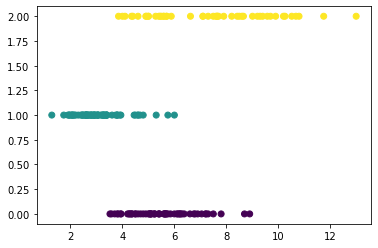

In [16]:
plt.scatter(X[:,9], y, c=y)

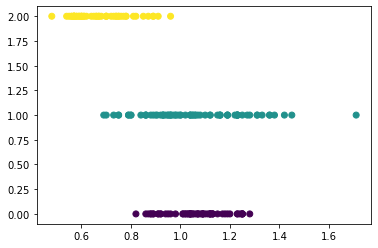

In [17]:
plt.scatter(X[:,10], y, c=y)

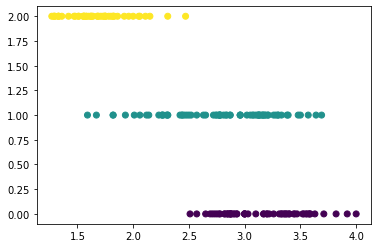

In [18]:
plt.scatter(X[:,11], y, c=y) #좋은 반비례 관계를 나타내고 있다.

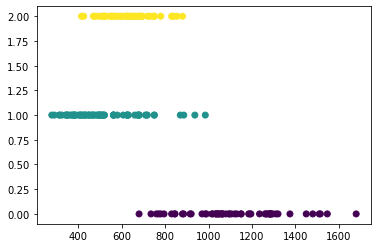

In [19]:
plt.scatter(X[:,12], y, c=y) 

#### X[:,5]와 X[:,6]  데이터에서 가장 선형적인 특징을 보이고 있어서, 이 데이터를 기준으로 그래프를 다시 그려보겠습니다.

#### 즉, Total phenols와 Flavanoids 기준으로 다시 그려 보겠습니다.

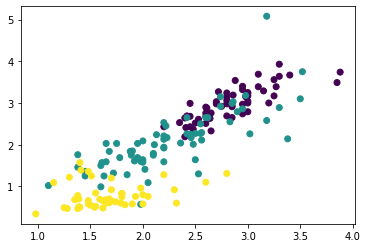

In [20]:
plt.scatter(X[:,5], X[:,6], c=y)

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters = 3)
Xi = [X[:,5], X[:,6]]
data_1 = np.transpose(Xi)
kmeans.fit(data_1)

KMeans(n_clusters=3)

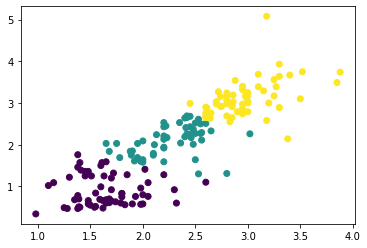

In [23]:
plt.scatter(X[:,5], X[:,6], c=kmeans.labels_)

k-means clustering은 중심점을 기준으로 비슷한 위치에서 클러스터링 해주기 때문에, wine clustering에서는 적합하지 않는 clustering인 것 같습니다.

## GMM clustering (각 클러스터들의 가우시안 분포에 속할 확률과 분산을 이용한 clustering)

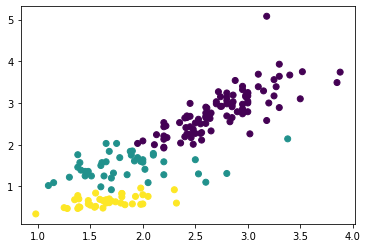

In [24]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(data_1)
labels_1 = gmm.predict(data_1)
plt.scatter(X[:,5], X[:,6], c=labels_1)

GMM 기법이 k-means 보다는 좀 더 유연하게 클러스터링 하는 것 같습니다.

## BIRCH clustering (cf tree를 이용한 clustering)

In [25]:
from sklearn.cluster import Birch
brc = Birch(branching_factor=50, n_clusters=3, threshold=0.2)

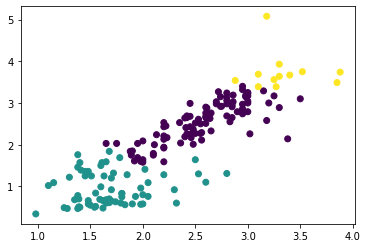

In [26]:
brc.fit(data_1)
labels_2 = brc.predict(data_1)
plt.scatter(X[:,5], X[:,6], c=labels_2)

## Agglomerative Clustering(병합 군집)

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
agg = AgglomerativeClustering(n_clusters=3)
labels_3 = agg.fit_predict(data_1)

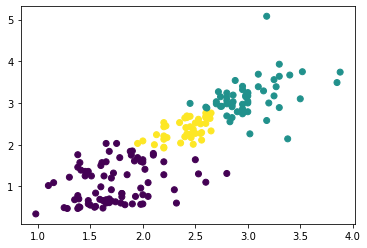

In [29]:
plt.scatter(X[:,5], X[:,6], c=labels_3)

## ※결론

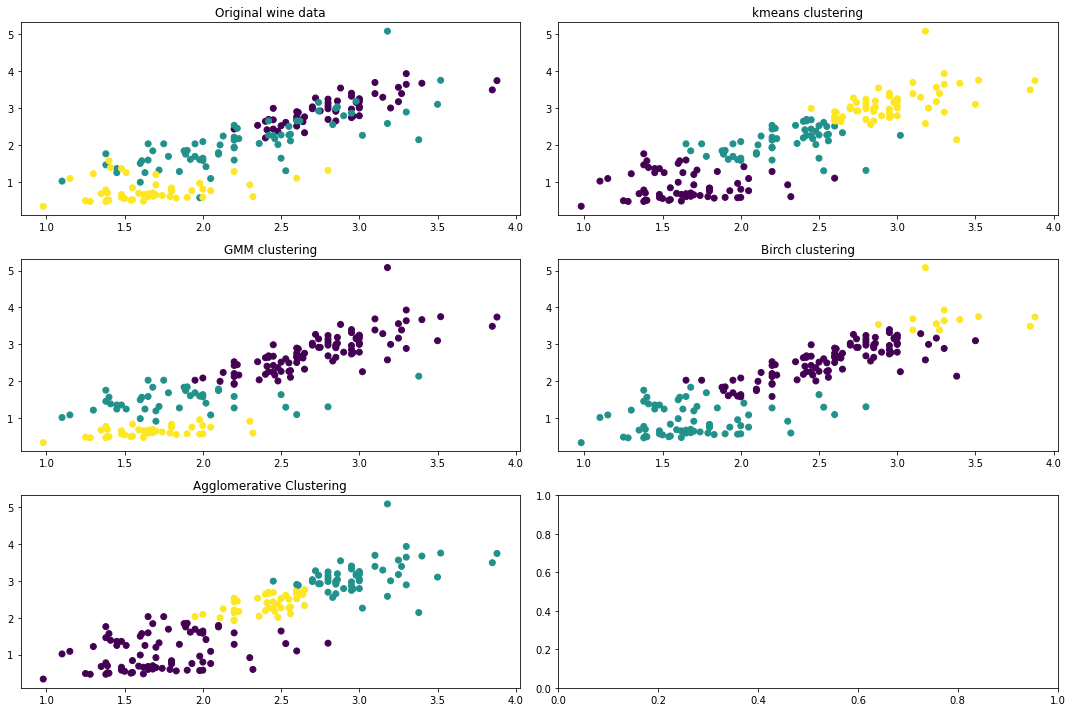

In [30]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))

ax[0, 0].scatter(X[:,5], X[:,6], c=y)
ax[0, 1].scatter(X[:,5], X[:,6], c=kmeans.labels_)
ax[1, 0].scatter(X[:,5], X[:,6], c=labels_1)
ax[1, 1].scatter(X[:,5], X[:,6], c=labels_2)
ax[2, 0].scatter(X[:,5], X[:,6], c=labels_3)

ax[0, 0].set_title("Original wine data")
ax[0, 1].set_title("kmeans clustering")
ax[1, 0].set_title("GMM clustering")
ax[1, 1].set_title("Birch clustering")
ax[2, 0].set_title("Agglomerative Clustering")

fig.tight_layout()
plt.show()

#### GMM clustering이 가장 유연하게 데이터를 분류한 것으로 보입니다. k-means clustering을 보완한 가장 좋은 기법으로 생각됩니다.
#### Birch clustering과 Agglomerative clustering은 k-means clustring과 별다른 차이를 보이지 못하였습니다.
#### wine clustering에서는 GMM 기법이 가장 좋은 결과를 나타내었습니다.